In [148]:
#Importing libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np

In [102]:
#Storing data
try:
    stock=pd.read_csv(r"../data/stock.csv")
    vix=pd.read_csv(r"../data/vix.csv")
except:
    aapl=yf.Ticker("AAPL")
    stock=aapl.history(start="2023-05-31",end="2025-05-31",interval="1d")
    stock.to_csv(r"../data/stock.csv")
    vix_ticker=yf.Ticker("^VIX")
    vix=vix_ticker.history(start="2023-05-31",end="2025-05-31",interval="1d")
    vix.to_csv(r"../data/vix.csv")


In [ ]:
#Remove time from index as this is causing confusion because of timezone differences
stock["Da"]

In [106]:
#Simple function that assumes 1.5% as the premium for Options
def naive_premium(df):
    df["OptionPremium"]=df.Close*0.015

In [111]:
naive_premium(stock)
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OptionPremium
Date,,,,,,,,
2023-05-31 00:00:00-04:00,175.572113,177.572093,175.007757,175.492905,99625300,0.0,0.0,2.632394
2023-06-01 00:00:00-04:00,175.938456,178.334465,175.176085,178.304764,68901800,0.0,0.0,2.674571
2023-06-02 00:00:00-04:00,179.235428,179.977993,177.482970,179.156219,61945900,0.0,0.0,2.687343
2023-06-05 00:00:00-04:00,180.819588,183.116582,176.275078,177.799820,121946500,0.0,0.0,2.666997
2023-06-06 00:00:00-04:00,178.185963,178.334470,175.671133,177.433502,64848400,0.0,0.0,2.661503


In [108]:
vix.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-31 00:00:00-05:00,18.040001,18.40,17.120001,17.940001,0,0.0,0.0
2023-06-01 00:00:00-05:00,17.240000,17.59,15.580000,15.650000,0,0.0,0.0
2023-06-02 00:00:00-05:00,15.650000,15.65,14.420000,14.600000,0,0.0,0.0
2023-06-05 00:00:00-05:00,15.280000,15.29,14.660000,14.730000,0,0.0,0.0
2023-06-06 00:00:00-05:00,14.910000,14.97,13.950000,13.960000,0,0.0,0.0


Assumption:
1. The option premium is 1.5% of closing price 

Text(0.5, 0, 'Date')

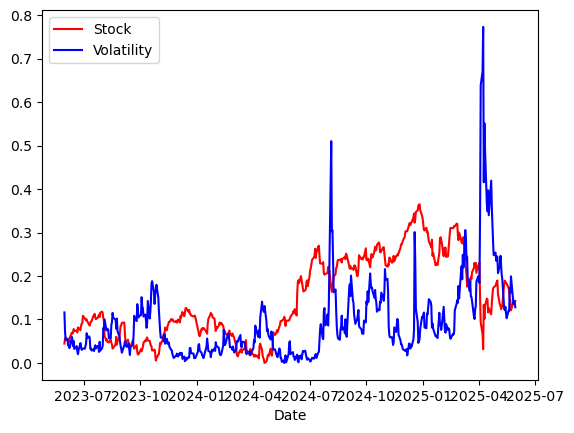

In [117]:
#Normalizing close values to compare how accurate vix is
stock["NormalizedClose"]=(stock.Close-stock.Close.min())/stock.Close.max()
vix["NormalizedClose"]=(vix.Close-vix.Close.min())/vix.Close.max()
plt.plot(stock.index,stock.NormalizedClose,label="Stock",color="red")
plt.plot(vix.index,vix.NormalizedClose,label="Volatility",color="blue")
plt.legend()
plt.xlabel("Date")

In [146]:
#This function applies a filter on volatility index and gets us a filtered stock dataframe
#Since stock data and VIX have a difference in timezone, we can't directly compare
#We use date for comparison
def high_volatility_filter(df,vix,VolThreshold):
    df_copy=df.copy()
    vix_copy=vix.copy()
    DatesToFilter=vix_copy[vix_copy.Close>VolThreshold].index.date
    mask=np.isin(df_copy.index.date,DatesToFilter)
    return df_copy.loc[mask]

In [149]:
filtered_stock=high_volatility_filter(stock,vix,15)

265


502